In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [84]:
starwars = pd.read_csv('StarWars.csv', encoding="ISO-8859-1")

In [85]:
starwars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [86]:
starwars = starwars[starwars['RespondentID'].notnull()]

In [87]:
starwars['RespondentID'].isnull().sum()

0

In [88]:
starwars['Have you seen any of the 6 films in the Star Wars franchise?'] = starwars['Have you seen any of the 6 films in the Star Wars franchise?'].map({'Yes':True, 'No': False})

In [89]:
starwars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = starwars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map({'Yes': True, 'No': False})

In [91]:
starwars[starwars.columns[3]] = starwars[starwars.columns[3]].map({'Star Wars: Episode I  The Phantom Menace': True, np.NaN:False})
starwars[starwars.columns[4]] = starwars[starwars.columns[4]].map({'Star Wars: Episode II  Attack of the Clones': True, np.NaN:False}) 
starwars[starwars.columns[5]] = starwars[starwars.columns[5]].map({'Star Wars: Episode III  Revenge of the Sith': True, np.NaN:False})
starwars[starwars.columns[6]] = starwars[starwars.columns[6]].map({'Star Wars: Episode IV  A New Hope': True, np.NaN:False})
starwars[starwars.columns[7]] = starwars[starwars.columns[7]].map({'Star Wars: Episode V The Empire Strikes Back': True, np.NaN:False})
starwars[starwars.columns[8]] = starwars[starwars.columns[8]].map({'Star Wars: Episode VI Return of the Jedi': True, np.NaN:False})

In [92]:
col_value = ['seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6'] 
col_key = starwars.columns[3:9]
for i,j in zip(col_key, col_value):
    starwars = starwars.rename(columns={i:j})
print (starwars)

      RespondentID  \
1     3.292880e+09   
2     3.292880e+09   
3     3.292765e+09   
4     3.292763e+09   
5     3.292731e+09   
6     3.292719e+09   
7     3.292685e+09   
8     3.292664e+09   
9     3.292654e+09   
10    3.292640e+09   
11    3.292638e+09   
12    3.292635e+09   
13    3.292609e+09   
14    3.292597e+09   
15    3.292587e+09   
16    3.292583e+09   
17    3.292581e+09   
18    3.292573e+09   
19    3.292565e+09   
20    3.292562e+09   
21    3.292522e+09   
22    3.292521e+09   
23    3.292512e+09   
24    3.292483e+09   
25    3.292465e+09   
26    3.292448e+09   
27    3.292420e+09   
28    3.292384e+09   
29    3.292380e+09   
30    3.292377e+09   
...            ...   
1157  3.288426e+09   
1158  3.288423e+09   
1159  3.288423e+09   
1160  3.288422e+09   
1161  3.288421e+09   
1162  3.288418e+09   
1163  3.288418e+09   
1164  3.288417e+09   
1165  3.288415e+09   
1166  3.288414e+09   
1167  3.288413e+09   
1168  3.288410e+09   
1169  3.288410e+09   
1170  3.28

In [93]:
starwars[starwars.columns[9:15]] = starwars[starwars.columns[9:15]].astype(float)

In [96]:
col_value = ['ranking_1', 'ranking_2', 'ranking_3', 'ranking_4', 'ranking_5', 'ranking_6'] 
col_key = starwars[starwars.columns[9:15]]
for i,j in zip(col_key, col_value):
    starwars = starwars.rename(columns={i:j})
print (starwars)

      RespondentID  \
1     3.292880e+09   
2     3.292880e+09   
3     3.292765e+09   
4     3.292763e+09   
5     3.292731e+09   
6     3.292719e+09   
7     3.292685e+09   
8     3.292664e+09   
9     3.292654e+09   
10    3.292640e+09   
11    3.292638e+09   
12    3.292635e+09   
13    3.292609e+09   
14    3.292597e+09   
15    3.292587e+09   
16    3.292583e+09   
17    3.292581e+09   
18    3.292573e+09   
19    3.292565e+09   
20    3.292562e+09   
21    3.292522e+09   
22    3.292521e+09   
23    3.292512e+09   
24    3.292483e+09   
25    3.292465e+09   
26    3.292448e+09   
27    3.292420e+09   
28    3.292384e+09   
29    3.292380e+09   
30    3.292377e+09   
...            ...   
1157  3.288426e+09   
1158  3.288423e+09   
1159  3.288423e+09   
1160  3.288422e+09   
1161  3.288421e+09   
1162  3.288418e+09   
1163  3.288418e+09   
1164  3.288417e+09   
1165  3.288415e+09   
1166  3.288414e+09   
1167  3.288413e+09   
1168  3.288410e+09   
1169  3.288410e+09   
1170  3.28

In [97]:
rank_mean = starwars[col_value].mean();rank_mean

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64

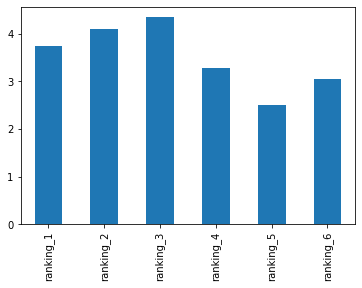

In [98]:
rank_mean.plot.bar()

#### Respondent have ranked the movie average, seen_6 movie was commented on the most

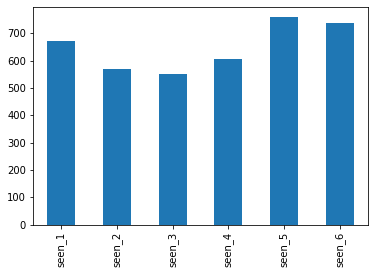

In [120]:
seen_sum = starwars[starwars.columns[3:9]].sum()
seen_sum.plot.bar()

In [119]:
rank_seen_corr = starwars[starwars.columns[3:15]].corr()
rank_seen_corr

,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6
seen_1,1.000000,0.783358,0.729996,0.665818,0.648044,0.653696,0.067218,0.013792,-0.067711,-0.146503,0.066301,0.079381
seen_2,0.783358,1.000000,0.883886,0.687882,0.611608,0.642843,0.246639,0.041711,-0.102122,-0.160216,-0.014686,-0.002038
seen_3,0.729996,0.883886,1.000000,0.698517,0.617805,0.651306,0.308085,0.134838,-0.181001,-0.147843,-0.049921,-0.053451
seen_4,0.665818,0.687882,0.698517,1.000000,0.734259,0.759477,0.440301,0.365598,0.174842,-0.554932,-0.136834,-0.143364
seen_5,0.648044,0.611608,0.617805,0.734259,1.000000,0.910124,0.385813,0.388224,0.248817,-0.130101,-0.422226,-0.368499
seen_6,0.653696,0.642843,0.651306,0.759477,0.910124,1.000000,0.431521,0.391197,0.237803,-0.159497,-0.272718,-0.509609
ranking_1,0.067218,0.246639,0.308085,0.440301,0.385813,0.431521,1.000000,0.415511,0.066760,-0.451862,-0.454098,-0.462642
ranking_2,0.013792,0.041711,0.134838,0.365598,0.388224,0.391197,0.415511,1.000000,0.336002,-0.435664,-0.528662,-0.532254
ranking_3,-0.067711,-0.102122,-0.181001,0.174842,0.248817,0.237803,0.066760,0.336002,1.000000,-0.299704,-0.452946,-0.421262
ranking_4,-0.146503,-0.160216,-0.147843,-0.554932,-0.130101,-0.159497,-0.451862,-0.435664,-0.299704,1.000000,0.003324,-0.043641


In [122]:
rank_col = starwars[starwars.columns[9:15]].sum()

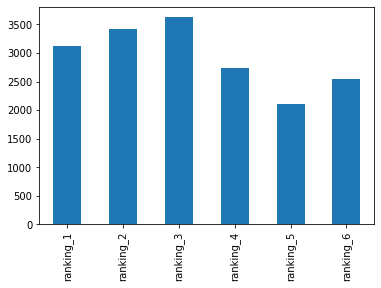

In [123]:
rank_col.plot.bar()

In [124]:
# ranking 6 is most seen

In [125]:
males = starwars[starwars["Gender"] == "Male"]
females = starwars[starwars["Gender"] == "Female"]

In [127]:
males

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,True,True,True,True,True,True,True,True,1.0,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,True,True,True,True,True,True,True,True,6.0,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,True,True,True,True,True,True,True,True,4.0,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,True,True,True,True,True,True,True,True,5.0,...,Somewhat favorably,Han,No,NaN,No,Male,18-29,"$0 - $24,999",Some college or Associate degree,South Atlantic
10,3.292640e+09,True,False,False,True,False,False,False,False,1.0,...,Very favorably,I don't understand this question,No,NaN,No,Male,18-29,"$25,000 - $49,999",Some college or Associate degree,Pacific


In [130]:
Mrank_col = males[males.columns[9:15]].sum();Mrank_col

ranking_1    1708.0
ranking_2    1787.0
ranking_3    1804.0
ranking_4    1268.0
ranking_5    1040.0
ranking_6    1270.0
dtype: float64

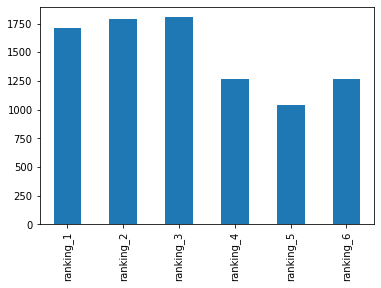

In [131]:
Mrank_col.plot.bar()

In [132]:
Frank_col = females[females.columns[9:15]].sum();Frank_col

ranking_1    1358.0
ranking_2    1570.0
ranking_3    1754.0
ranking_4    1407.0
ranking_5    1020.0
ranking_6    1222.0
dtype: float64

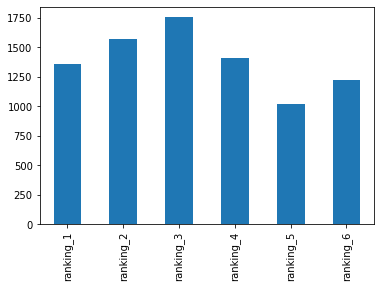

In [133]:
Frank_col.plot.bar()

In [134]:
Mrank_seen_corr = males[males.columns[3:15]].corr()
Mrank_seen_corr

,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6
seen_1,1.000000,0.779494,0.748804,0.599975,0.577867,0.618570,0.089147,0.038380,-0.091134,-0.111605,-0.002455,0.077845
seen_2,0.779494,1.000000,0.886254,0.634963,0.591477,0.624778,0.238391,0.058293,-0.086099,-0.147376,-0.058368,-0.009869
seen_3,0.748804,0.886254,1.000000,0.649409,0.584269,0.626840,0.280050,0.121772,-0.168202,-0.132037,-0.082929,-0.030632
seen_4,0.599975,0.634963,0.649409,1.000000,0.694295,0.729159,0.437728,0.322992,0.148076,-0.523816,-0.163455,-0.141931
seen_5,0.577867,0.591477,0.584269,0.694295,1.000000,0.899518,0.396184,0.380990,0.205629,-0.156279,-0.358428,-0.418747
seen_6,0.618570,0.624778,0.626840,0.729159,0.899518,1.000000,0.436704,0.356575,0.212607,-0.175132,-0.283569,-0.499764
ranking_1,0.089147,0.238391,0.280050,0.437728,0.396184,0.436704,1.000000,0.355192,0.019126,-0.438072,-0.497450,-0.420215
ranking_2,0.038380,0.058293,0.121772,0.322992,0.380990,0.356575,0.355192,1.000000,0.249995,-0.417809,-0.496153,-0.527938
ranking_3,-0.091134,-0.086099,-0.168202,0.148076,0.205629,0.212607,0.019126,0.249995,1.000000,-0.328735,-0.414069,-0.358134
ranking_4,-0.111605,-0.147376,-0.132037,-0.523816,-0.156279,-0.175132,-0.438072,-0.417809,-0.328735,1.000000,0.054985,-0.041717


In [135]:
Frank_seen_corr = females[females.columns[3:15]].corr()
Frank_seen_corr

,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6
seen_1,1.000000,0.718679,0.629535,0.605457,0.560077,0.545201,-0.007247,-0.037029,-0.039827,-0.143525,0.142166,0.094853
seen_2,0.718679,1.000000,0.840473,0.633522,0.495928,0.537420,0.189340,-0.024065,-0.113744,-0.120589,0.051242,0.027646
seen_3,0.629535,0.840473,1.000000,0.646583,0.521006,0.559447,0.273363,0.102884,-0.194503,-0.105146,0.005106,-0.052750
seen_4,0.605457,0.633522,0.646583,1.000000,0.678719,0.705801,0.411421,0.395957,0.237211,-0.560874,-0.111389,-0.148739
seen_5,0.560077,0.495928,0.521006,0.678719,1.000000,0.872761,0.360489,0.378783,0.288023,-0.094583,-0.462742,-0.311975
seen_6,0.545201,0.537420,0.559447,0.705801,0.872761,1.000000,0.412158,0.404959,0.265649,-0.128268,-0.243456,-0.511560
ranking_1,-0.007247,0.189340,0.273363,0.411421,0.360489,0.412158,1.000000,0.451897,0.134123,-0.437947,-0.395677,-0.505000
ranking_2,-0.037029,-0.024065,0.102884,0.395957,0.378783,0.404959,0.451897,1.000000,0.434887,-0.434848,-0.555904,-0.529326
ranking_3,-0.039827,-0.113744,-0.194503,0.237211,0.288023,0.265649,0.134123,0.434887,1.000000,-0.300355,-0.490316,-0.469981
ranking_4,-0.143525,-0.120589,-0.105146,-0.560874,-0.094583,-0.128268,-0.437947,-0.434848,-0.300355,1.000000,-0.055082,-0.059430


In [137]:
females[females.columns[3:9]].sum()

seen_1    298
seen_2    237
seen_3    222
seen_4    255
seen_5    353
seen_6    338
dtype: int64

In [138]:
males[males.columns[3:9]].sum()

seen_1    361
seen_2    323
seen_3    317
seen_4    342
seen_5    392
seen_6    387
dtype: int64

In [ ]:
### males are more interested in the movies 